# `Telecom-Churn-CaseStudy`

### With predictor variables, we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as 'churn'.

## `we need to build two models` 

###  Interpretable model :To predict the important variables,Using Logistic Regression and RFE
### High Perfomance model :Robust model and using PCA

# `step 1 Reading and Understanding Data`

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None) # to display all the columns
pd.set_option('display.max_rows', None) # to display all the rows

In [2]:
#Importing the Data 
data = pd.read_csv("D:\\telecom_churn_data.csv")
data.shape

(99999, 226)

In [3]:
#Inspecting data
data.head(20)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [4]:
#checking numeric data
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [5]:
#checking data types of columns
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

# `Step 2 Data Cleaning`

In [6]:
#Checking the number of null values in each columns
data.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

### Lets Drop the Date columns since they will not be required in our Analysis

In [7]:
data=data.drop(["last_date_of_month_6","last_date_of_month_7","last_date_of_month_8","last_date_of_month_9","date_of_last_rech_6","date_of_last_rech_7","date_of_last_rech_8","date_of_last_rech_9","date_of_last_rech_data_6","date_of_last_rech_data_7","date_of_last_rech_data_8","date_of_last_rech_data_9"],axis=1)

In [8]:
data.shape

(99999, 214)

In [9]:
#Checking the number of null values in each columns
data.isnull().sum()

mobile_number             0
circle_id                 0
loc_og_t2o_mou         1018
std_og_t2o_mou         1018
loc_ic_t2o_mou         1018
arpu_6                    0
arpu_7                    0
arpu_8                    0
arpu_9                    0
onnet_mou_6            3937
onnet_mou_7            3859
onnet_mou_8            5378
onnet_mou_9            7745
offnet_mou_6           3937
offnet_mou_7           3859
offnet_mou_8           5378
offnet_mou_9           7745
roam_ic_mou_6          3937
roam_ic_mou_7          3859
roam_ic_mou_8          5378
roam_ic_mou_9          7745
roam_og_mou_6          3937
roam_og_mou_7          3859
roam_og_mou_8          5378
roam_og_mou_9          7745
loc_og_t2t_mou_6       3937
loc_og_t2t_mou_7       3859
loc_og_t2t_mou_8       5378
loc_og_t2t_mou_9       7745
loc_og_t2m_mou_6       3937
loc_og_t2m_mou_7       3859
loc_og_t2m_mou_8       5378
loc_og_t2m_mou_9       7745
loc_og_t2f_mou_6       3937
loc_og_t2f_mou_7       3859
loc_og_t2f_mou_8    

### Lets Impute the Meaningfull Missing Values

In [10]:
#Checking column loc_og_t2o_mou
data.loc_og_t2o_mou.value_counts()

0.0    98981
Name: loc_og_t2o_mou, dtype: int64

`column loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou have same value i.e 0.0 in all rows so these columns can be droped because they will not contribute in anaysis`

In [11]:
#dropping above mentioned columns
data=data.drop(["loc_og_t2o_mou","std_og_t2o_mou","loc_ic_t2o_mou"],axis=1)

In [12]:
data.shape

(99999, 211)

In [13]:
#imputig the minutes column null values with 0.00

cols=["onnet_mou_6","onnet_mou_7","onnet_mou_8","onnet_mou_9","offnet_mou_6","offnet_mou_7","offnet_mou_8","offnet_mou_9",
    "roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8","roam_ic_mou_9","roam_og_mou_6","roam_og_mou_7","roam_og_mou_8",
    "roam_og_mou_9","loc_og_t2t_mou_6","loc_og_t2t_mou_7","loc_og_t2t_mou_8","loc_og_t2t_mou_9",
    "loc_og_t2m_mou_6","loc_og_t2m_mou_7","loc_og_t2m_mou_8","loc_og_t2m_mou_9",
    "loc_og_t2f_mou_6","loc_og_t2f_mou_7","loc_og_t2f_mou_8","loc_og_t2f_mou_9",
    "loc_og_t2c_mou_6","loc_og_t2c_mou_7","loc_og_t2c_mou_8","loc_og_t2c_mou_9",
    "loc_og_mou_6","loc_og_mou_7","loc_og_mou_8","loc_og_mou_9",
    "std_og_t2t_mou_6","std_og_t2t_mou_7","std_og_t2t_mou_8","std_og_t2t_mou_9",
    "std_og_t2m_mou_6","std_og_t2m_mou_7","std_og_t2m_mou_8","std_og_t2m_mou_9",
    "std_og_t2f_mou_6","std_og_t2f_mou_7","std_og_t2f_mou_8","std_og_t2f_mou_9",
    "std_og_t2c_mou_6","std_og_t2c_mou_7","std_og_t2c_mou_8","std_og_t2c_mou_9",
    "std_og_mou_6","std_og_mou_7","std_og_mou_8","std_og_mou_9","isd_og_mou_6",
    "isd_og_mou_7","isd_og_mou_8","isd_og_mou_9","spl_og_mou_6","spl_og_mou_7",
    "spl_og_mou_8","spl_og_mou_9","og_others_6","og_others_7","og_others_8","og_others_9",
    "loc_ic_t2t_mou_6","loc_ic_t2t_mou_7","loc_ic_t2t_mou_8","loc_ic_t2t_mou_9",
    "loc_ic_t2m_mou_6","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8","loc_ic_t2m_mou_9",
    "loc_ic_t2f_mou_6","loc_ic_t2f_mou_7","loc_ic_t2f_mou_8","loc_ic_t2f_mou_9",
    "loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8","loc_ic_mou_9",
     "std_ic_t2t_mou_6","std_ic_t2t_mou_7","std_ic_t2t_mou_8","std_ic_t2t_mou_9",
     "std_ic_t2m_mou_6","std_ic_t2m_mou_7","std_ic_t2m_mou_8","std_ic_t2m_mou_9",
     "std_ic_t2f_mou_6","std_ic_t2f_mou_7","std_ic_t2f_mou_8","std_ic_t2f_mou_9",
     "std_ic_t2o_mou_6","std_ic_t2o_mou_7","std_ic_t2o_mou_8","std_ic_t2o_mou_9",
     "std_ic_mou_6","std_ic_mou_7","std_ic_mou_8","std_ic_mou_9",
     "spl_ic_mou_6","spl_ic_mou_7","spl_ic_mou_8","spl_ic_mou_9",
     "isd_ic_mou_6","isd_ic_mou_7","isd_ic_mou_8","isd_ic_mou_9",
     "ic_others_6","ic_others_7","ic_others_8","ic_others_9"]



In [14]:
data[cols]=data[cols].replace(np.NaN,0.00)

In [15]:
#Checking the number of null values in each columns
data.isnull().sum()

mobile_number             0
circle_id                 0
arpu_6                    0
arpu_7                    0
arpu_8                    0
arpu_9                    0
onnet_mou_6               0
onnet_mou_7               0
onnet_mou_8               0
onnet_mou_9               0
offnet_mou_6              0
offnet_mou_7              0
offnet_mou_8              0
offnet_mou_9              0
roam_ic_mou_6             0
roam_ic_mou_7             0
roam_ic_mou_8             0
roam_ic_mou_9             0
roam_og_mou_6             0
roam_og_mou_7             0
roam_og_mou_8             0
roam_og_mou_9             0
loc_og_t2t_mou_6          0
loc_og_t2t_mou_7          0
loc_og_t2t_mou_8          0
loc_og_t2t_mou_9          0
loc_og_t2m_mou_6          0
loc_og_t2m_mou_7          0
loc_og_t2m_mou_8          0
loc_og_t2m_mou_9          0
loc_og_t2f_mou_6          0
loc_og_t2f_mou_7          0
loc_og_t2f_mou_8          0
loc_og_t2f_mou_9          0
loc_og_t2c_mou_6          0
loc_og_t2c_mou_7    

In [16]:
#Checking column total_rech_data_6 
data.total_rech_data_6.value_counts().head()

1.0    13309
2.0     5186
3.0     2065
4.0     1335
5.0      808
Name: total_rech_data_6, dtype: int64

#### ` Here missng values cant be imputed with zero because there is no entry regarding 0 data recharge , User have availed atleast one recharge so we can impute missing with 1.0`

In [17]:
#Imputing null values with 1.0 assuming every user have aviled atleast one data recharge 
data[["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9"]]=data[["total_rech_data_6","total_rech_data_7","total_rech_data_8","total_rech_data_9"]].replace(np.NaN,1.0)

In [18]:
#Checking column max_rech_amt_6
data.max_rech_amt_6.value_counts().head()

110    21030
0      11195
50      9555
30      9322
120     5891
Name: max_rech_amt_6, dtype: int64

#### `Here null values can be imputed with zero since variable has entries for zero for recharge amount `

In [19]:
#Imputing null values with 0
data[["max_rech_data_6","max_rech_data_7","max_rech_data_8","max_rech_data_9"]]=data[["max_rech_data_6","max_rech_data_7","max_rech_data_8","max_rech_data_9"]].replace(np.NaN,0)

In [20]:
#Checking column count_rech_2g_6
data.count_rech_2g_6.value_counts().head()

1.0    10902
0.0     5920
2.0     3240
3.0     1461
4.0      984
Name: count_rech_2g_6, dtype: int64

#### `here null values can be imputed with 0.0 since its number of data rechrges for particular month for 2g, 3g and so on `

In [21]:
data[["count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_2g_9","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9"]]=data[["count_rech_2g_6","count_rech_2g_7","count_rech_2g_8","count_rech_2g_9","count_rech_3g_6","count_rech_3g_7","count_rech_3g_8","count_rech_3g_9"]].replace(np.NaN,0.0)


In [22]:
#Checking column av_rech_amt_data_6
data.av_rech_amt_data_6.value_counts().head()

154.0    3718
252.0    1889
198.0    1074
25.0      962
98.0      794
Name: av_rech_amt_data_6, dtype: int64

#### `Here Null values can be imputed with mode `

In [23]:
#Imputing the null values with mode
data[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"]]=data[["av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","av_rech_amt_data_9"]].replace(np.NaN,154.00)

In [24]:
#Checking column arpu_3g_6 
data.arpu_3g_6.value_counts().head()

0.00      10930
212.17      667
0.01        439
122.07      418
63.96       306
Name: arpu_3g_6, dtype: int64

#### ` Null values for above column can be imputed with 0.00 since we can not assume the average revenue per user`

In [25]:
data[["arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9","arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9"]]=data[["arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9","arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9"]].replace(np.NaN,0.00)

In [26]:
#Checking column night_pck_user_6 
data.night_pck_user_6.value_counts()

0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

#### `we can impute null values with 0.0 assuming missing entries are users who have not availed night pack`

In [27]:
data[["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9"]]=data[["night_pck_user_6","night_pck_user_7","night_pck_user_8","night_pck_user_9"]].replace(np.NaN,0.0)

In [28]:
#Checking column fb_user_6
data.fb_user_6.value_counts()

1.0    23000
0.0     2153
Name: fb_user_6, dtype: int64

#### ` we can imput null values with 0.0 assuming missing values are users who are not fb users`

In [29]:
data[["fb_user_6","fb_user_7","fb_user_8","fb_user_9"]]=data[["fb_user_6","fb_user_7","fb_user_8","fb_user_9"]].replace(np.NaN,0.0)

In [30]:
#Checking the number of null values in each columns
data.isnull().sum()

mobile_number         0
circle_id             0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9    

# `Step 3 Filtering High Value customers (HVC)`

#### first we nned to calculate the average recharge done by customer in june and july and create new variable "total_rech-amt"

In [31]:
data["total_rech_amt"]=data["total_rech_num_6"]+data["total_rech_num_7"]/2

In [32]:
#calculating 70 percentile for total_rech_amt
np.percentile(data["total_rech_amt"],70)

12.5

In [33]:
dataFilterd=data[data["total_rech_amt"]>np.percentile(data["total_rech_amt"],70)]

In [34]:
dataFilterd.shape

(29115, 212)

### Now we have acquired our final data frame on which we will do our analysis i.e dataFilterd

# `Step 4 Derive target Variable` 

#### we do not have any readymade target varaible , we can derive it based on the activities happened in 9th month

##### total_ic_mou_9=0
##### total_og_mou_9=0
##### vol_2g_mb_9=0
##### vol_3g_mb_9=0

#### `if all above condition are true then its a case of churn i.e Target=1 else Target=0`
#### `Creating Target Vatable named 'Target`

In [35]:
#creating new variable Target based on above conditions 

dataFilterdChurn=dataFilterd[(dataFilterd["total_og_mou_9"]==0) & (dataFilterd["total_ic_mou_9"]==0) & (dataFilterd["vol_2g_mb_9"]==0) & (dataFilterd["vol_3g_mb_9"]==0)]

In [36]:
dataFilterdChurn.shape

(3000, 212)

In [37]:
dataFilterdUnChurn=dataFilterd[~((dataFilterd["total_og_mou_9"]==0) & (dataFilterd["total_ic_mou_9"]==0) & (dataFilterd["vol_2g_mb_9"]==0) & (dataFilterd["vol_3g_mb_9"]==0))]

In [38]:
dataFilterdUnChurn.shape

(26115, 212)

In [39]:
#Assigninh value 1 to target variable for customers who are likey to churn
dataFilterdChurn["Target"]=1

<ipython-input-39-795dd4d9068a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFilterdChurn["Target"]=1


In [40]:
#Assign value 0 to target variable for customers who are not likey to churn
dataFilterdUnChurn["Target"]=0

<ipython-input-40-3c1a9b386c92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFilterdUnChurn["Target"]=0


In [41]:
#lets concat above two data frames into one 
dataFinal=pd.concat([dataFilterdChurn,dataFilterdUnChurn],axis=0)

In [42]:
dataFinal.shape

(29115, 213)

# `Step 5 : Dropping all 9th month Data from dataFinal`

In [43]:
#dropping all variables with extension _9
dataFinal=dataFinal.drop(["loc_og_t2f_mou_9","arpu_9","onnet_mou_9","offnet_mou_9","roam_ic_mou_9","roam_og_mou_9","loc_og_t2t_mou_9","loc_og_t2m_mou_9","loc_og_t2c_mou_9","loc_og_mou_9","std_og_t2t_mou_9","std_og_t2m_mou_9","std_og_t2f_mou_9","std_og_t2c_mou_9","std_og_mou_9","isd_og_mou_9","spl_og_mou_9","og_others_9","total_og_mou_9","loc_ic_t2t_mou_9","loc_ic_t2m_mou_9","loc_ic_t2f_mou_9","loc_ic_mou_9","std_ic_t2t_mou_9","std_ic_t2m_mou_9","std_ic_t2f_mou_9","std_ic_t2o_mou_9","std_ic_mou_9","total_ic_mou_9","spl_ic_mou_9","isd_ic_mou_9","ic_others_9","total_rech_num_9","total_rech_amt_9","max_rech_amt_9","last_day_rch_amt_9","total_rech_data_9","max_rech_data_9","count_rech_2g_9","count_rech_3g_9","av_rech_amt_data_9","vol_2g_mb_9","vol_3g_mb_9","arpu_3g_9","arpu_2g_9","night_pck_user_9","monthly_2g_9","sachet_2g_9","monthly_3g_9","sachet_3g_9","fb_user_9"],axis=1)

In [44]:
#Checking the number of null values in each columns
dataFinal.isnull().sum()

mobile_number         0
circle_id             0
arpu_6                0
arpu_7                0
arpu_8                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7      0
std_og_t2t_mou_8      0
std_og_t2m_mou_6      0
std_og_t2m_mou_7      0
std_og_t2m_mou_8      0
std_og_t2f_mou_6      0
std_og_t2f_mou_7      0
std_og_t2f_mou_8      0
std_og_t2c_mou_6

# `Step 6: Data Prepration`

In [45]:
dataFinal.head(10)

,mobile_number,circle_id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt,Target
45,7002388962,109,247.064,7.500,0.000,7.94,0.00,0.00,146.91,0.00,0.00,25.48,0.00,0.00,154.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,12,5,1,250,0,0,50,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,154.0,154.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,740,0.00,0.0,0.0,0.0,14.5,1
83,7000461616,109,153.455,157.462,32.853,119.34,137.94,16.51,36.16,252.59,2.03,0.10,0.00,0.00,0.00,0.00,0.00,0.08,0.19,0.00,0.13,0.25,0.00,0.00,0.00,0.00,1.85,137.06,0.00,0.21,0.44,0.00,119.26,137.74,16.51,29.19,5.24,0.00,0.0,0.0,0.0,0.0,0.0,0.0,148.46,142.99,16.51,0.0,0.0,0.0,16.48,306.63,5.41,0.00,0.0,0.0,165.16,450.08,21.93,0.13,0.43,0.00,0.50,0.79,0.00,0.00,0.00,0.00,0.63,1.23,0.00,32.03,36.28,0.76,146.08,19.44,0.00,0.00,0.0,0.0,0.0,0.0,0.0,178.11,55.73,0.76,178.74,56.96,0.76,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,12,18,5,180,170,37,20,30,17,20,0,10,1.0,1.0,1.0,0.0,0.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,154.0,154.0,17.0,0.00,0.00,42.07,0.0,0.0,44.63,0.00,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,433,70.99,0.0,0.0,0.0,21.0,1
97,7000589828,109,374.863,294.023,183.043,433.59,415.66,221.06,74.54,43.66,31.86,0.00,0.00,6.16,0.00,0.00,23.91,2.83,16.19,9.73,16.99,23.14,17.79,3.54,1.46,1.83,0.40,0.00,0.00,23.38,40.81,29.

In [46]:
dataFinal["Target"].isnull().sum()

0

In [47]:
dataFinal.shape

(29115, 162)

In [48]:
#letsdrop the columns which doesnt seems to be relevant for our analysis
# lets drop mobile number and circle id
dataFinal=dataFinal.drop(["mobile_number","circle_id","total_rech_amt"],axis=1)
dataFinal.shape

(29115, 159)

## Lets do some EDA on our data for better Insight

In [49]:
#lets divide our data into two dataframes based on Target variable
dataFinalChurn=dataFinal[dataFinal["Target"]==1]
dataFinalNonChurn=dataFinal[dataFinal["Target"]==0]
print("shape of churn data",dataFinalChurn.shape)
print("shape of nonchurn data",dataFinalNonChurn.shape)

shape of churn data (3000, 159)
shape of nonchurn data (26115, 159)


In [50]:
#lets calculate the percentage of churn and non churn data 
percentage1=100*(len(dataFinalChurn.index)/len(dataFinal.index))
percentage2=100*(len(dataFinalNonChurn.index)/len(dataFinal.index))
print("percentage of customers who are likey to churn is",percentage1)
print("percentage of customers who are  not likey to churn is",percentage2)

percentage of customers who are likey to churn is 10.303967027305513
percentage of customers who are  not likey to churn is 89.69603297269448


### ` we can see that as per data 10.30 percent customers are likey to churn and we need to figure out the attributes of such customers`

In [51]:
#Bivariant Analyis 
# Correlation Matrix

corrmat = dataFinal.corr()
corrmat

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Target
arpu_6,1.000000,0.745208,0.675299,0.387518,0.263911,0.226311,0.556673,0.396781,0.337809,0.133640,0.096285,0.102336,0.213349,0.175124,0.148612,0.189549,0.154524,0.149598,0.364981,0.293683,0.265555,0.171327,0.147827,0.146982,0.029993,0.007646,0.004505,0.362460,0.292361,0.268397,0.312184,0.200275,0.164179,0.342139,0.224898,0.177203,0.080682,0.072506,0.062986,NaN,NaN,NaN,0.442115,0.286618,0.228089,4.750684e-01,0.439043,0.432110,0.084093,0.039475,0.020908,0.042416,2.420618e-03,0.000723,0.619858,0.431515,0.361083,0.082970,0.070052,0.070610,0.172559,0.144005,0.125123,0.048933,0.044348,0.040209,0.171862,0.144138,0.129724,0.085588,0.061633,0.059025,0.085260,0.064546,0.063030,0.042577,0.040232,0.037208,NaN,NaN,NaN,0.116396,0.086187,8.253664e-02,0.217151,0.174082,0.158565,-0.004767,-0.067865,-0.051881,0.130774,0.079712,0.076328,0.022526,0.037424,0.017157,0.341301,0.094828,0.066337,0.987504,0.738237,0.672533,0.611254,0.501977,0.477273,0.522762,0.452283,0.363993,-0.023417,-0.048156,-0.035724,0.266808,0.206815,0.213469,-0.074710,-0.090528,-0.073291,0.151697,0.108960,0.100546,0.255860,0.176430,0.170859,0.028423,0.008687,0.006761,0.235211,0.185162,0.180542,0.315041,0.229838,0.232656,0.298639,0.209880,0.217968,0.018226,0.000485,0.021235,0.095404,0.068002,0.060501,-0.086153,-0.098553,-0.080688,0.267589,0.203138,0.206561,0.044049,0.029690,0.023706,0.075150,0.045455,5.559381e-02,0.062487,0.169526,0.176138,0.202483,0.082734,0.038848
arpu_7,0.745208,1.000000,0.815914,0.252090,0.372347,0.312389,0.398837,0.544869,0.445767,0.103211,0.095057,0.104526,0.154189,0.198173,0.170573,0.131461,0.181591,0.158854,0.254935,0.348837,0.301405,0.148927,0.169288,0.161698,0.005299,0.039004,0.033289,0.253668,0.345722

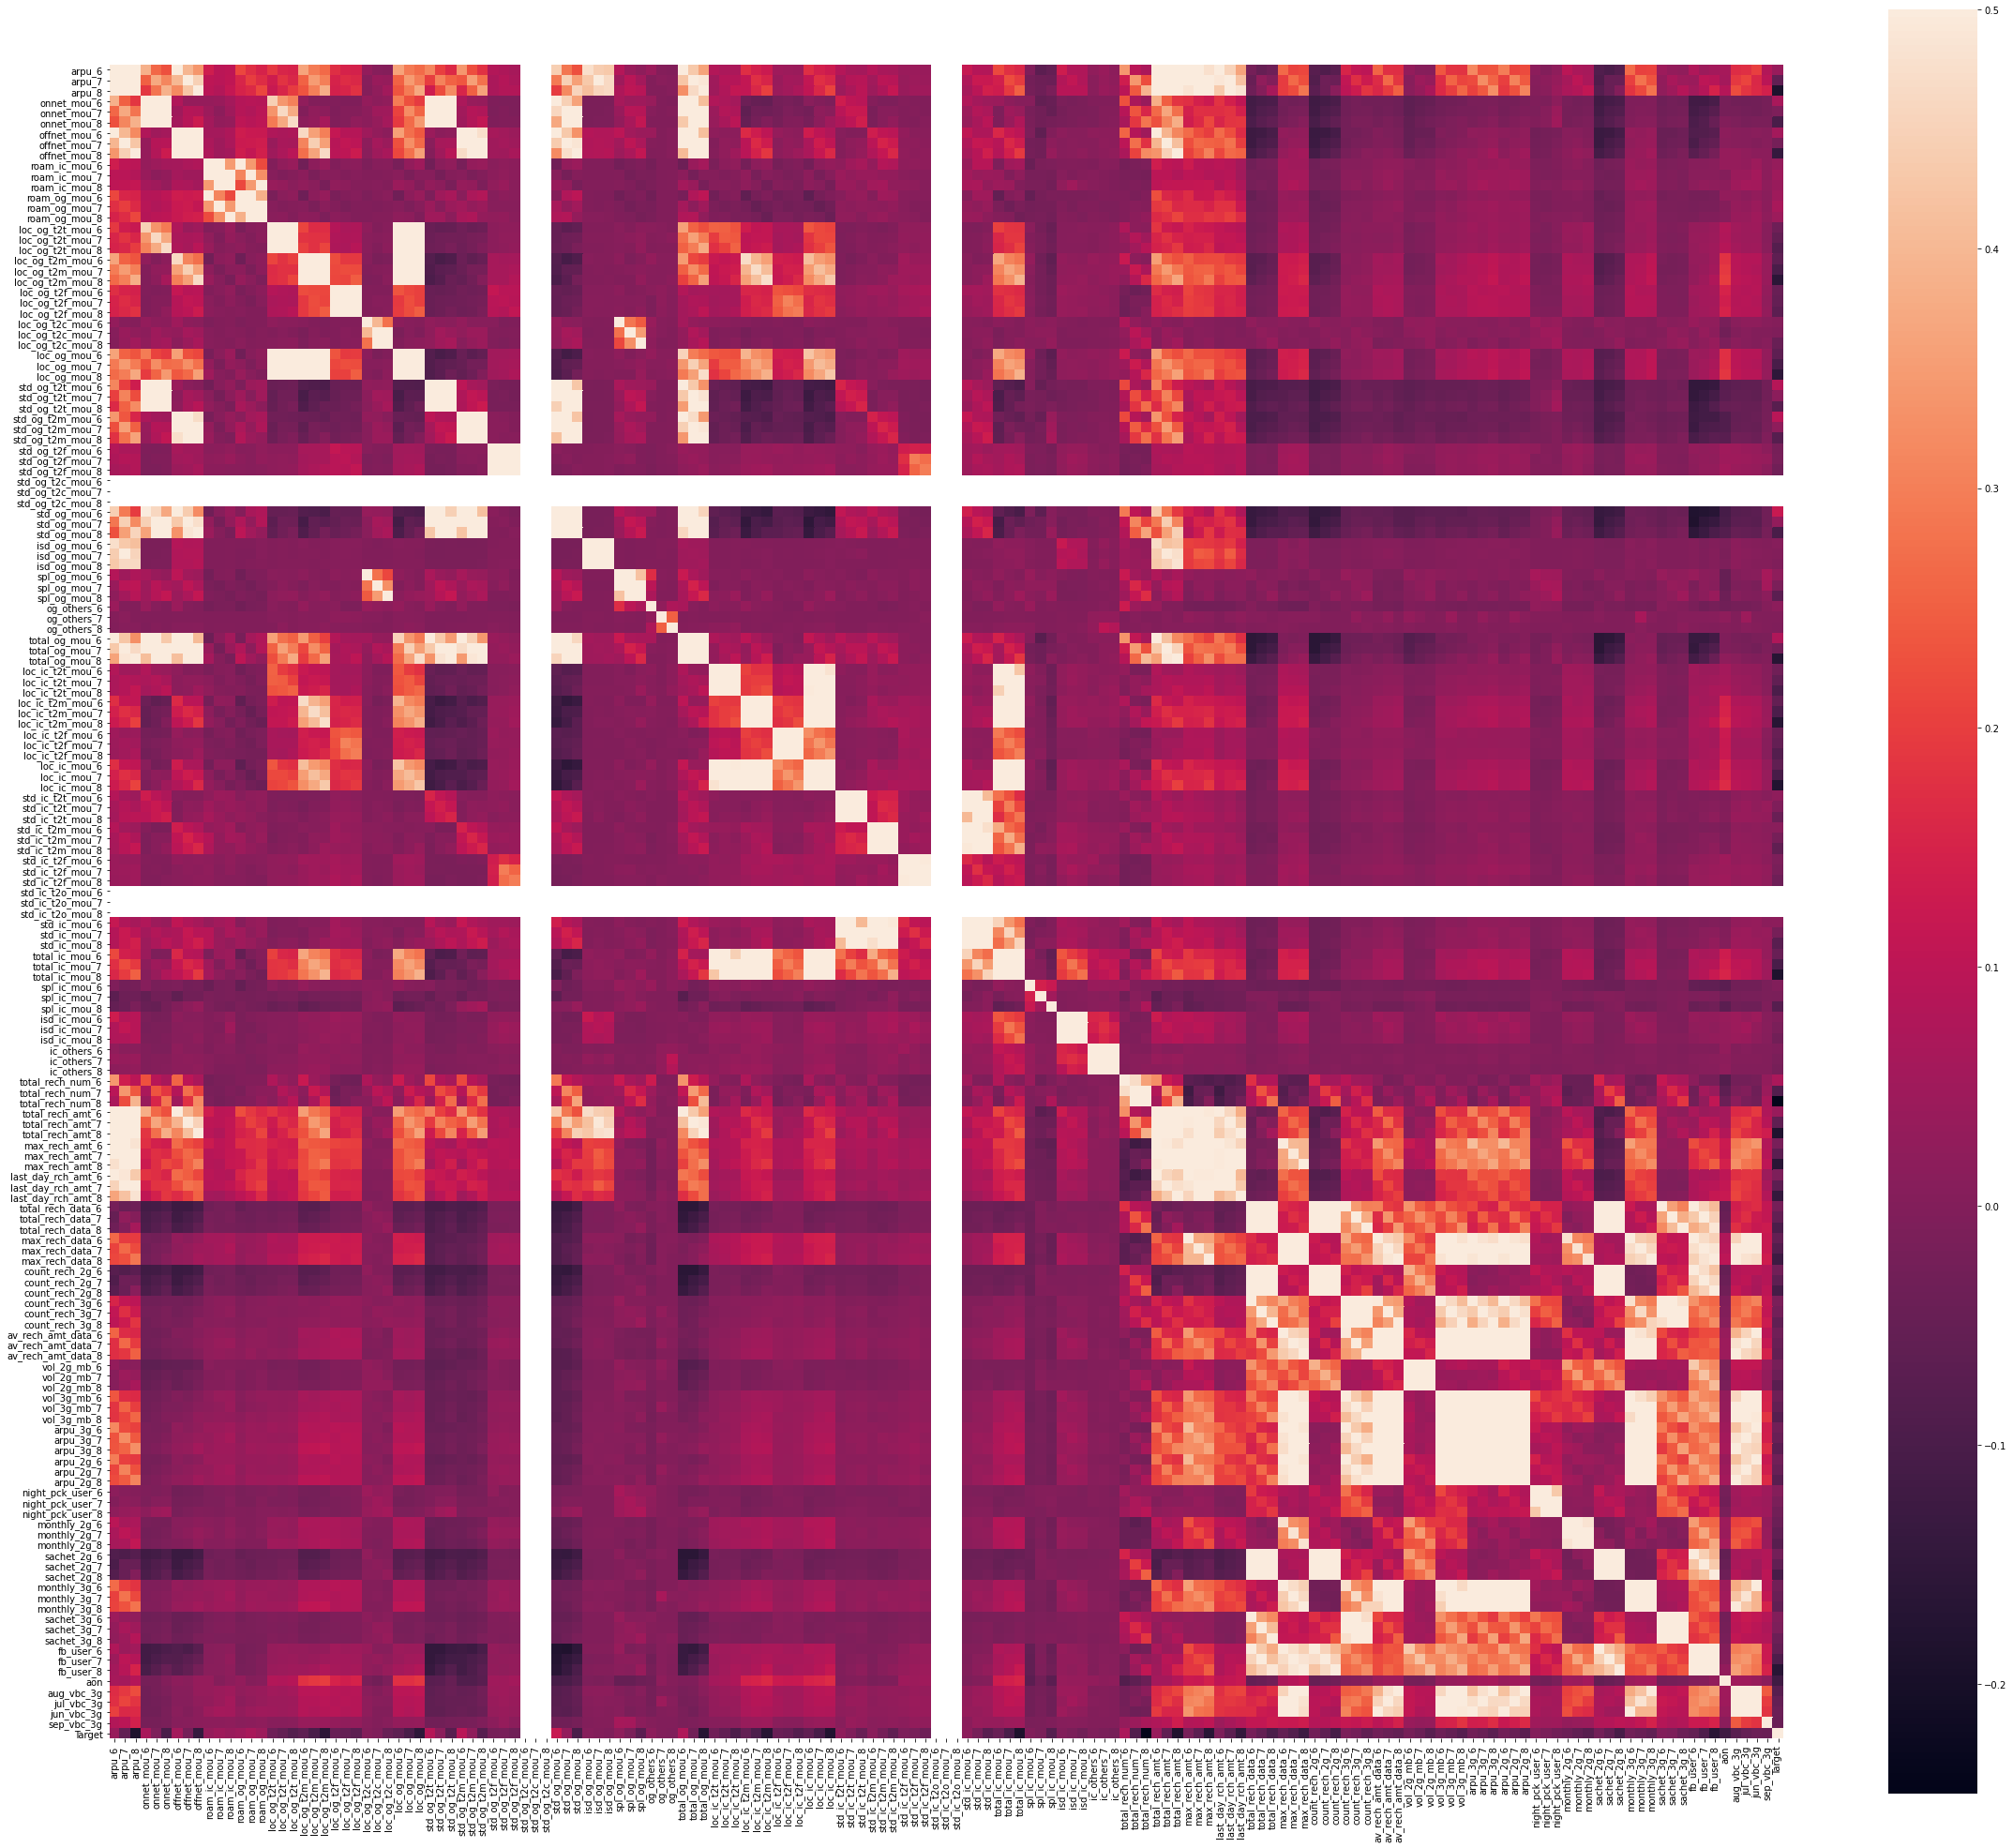

In [52]:
import seaborn as sns
plt.figure(figsize=(40,35))
sns.heatmap(corrmat, vmax=0.5, square=True);

### `Since nothing much is visible in above heat map so we can choose few variables which we consider as important and built correlatins among them`

In [53]:
#shortlisting columns
# we need to include target variable too in this to find its correlation with variables
colchurn=["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8","total_og_mou_6","total_og_mou_7","total_og_mou_8","total_ic_mou_6",
         "total_ic_mou_7","total_ic_mou_8","max_rech_amt_6","max_rech_amt_7","max_rech_amt_8","av_rech_amt_data_6","av_rech_amt_data_7","av_rech_amt_data_8","Target"]

In [54]:
# Correlation Matrix

corrmat = dataFinal[colchurn].corr()
corrmat

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,Target
loc_og_mou_6,1.000000,0.798023,0.714827,0.452538,0.297598,0.269687,0.373933,0.319395,0.304479,0.264178,0.227155,0.226247,0.049593,0.045887,0.056419,-0.064311
loc_og_mou_7,0.798023,1.000000,0.836225,0.342167,0.445270,0.365550,0.305014,0.361340,0.340047,0.248777,0.261436,0.262634,0.044058,0.043692,0.052169,-0.102478
loc_og_mou_8,0.714827,0.836225,1.000000,0.292788,0.355716,0.473215,0.282926,0.323981,0.387926,0.237347,0.250276,0.293376,0.049351,0.053112,0.059878,-0.155360
total_og_mou_6,0.452538,0.342167,0.292788,1.000000,0.702031,0.552349,0.146922,0.095613,0.071610,0.279530,0.232048,0.203422,-0.020698,-0.028483,-0.036401,0.074834
total_og_mou_7,0.297598,0.445270,0.355716,0.702031,1.000000,0.772243,0.058726,0.147181,0.118027,0.230087,0.282309,0.273274,-0.026234,-0.021932,-0.039171,-0.029171
total_og_mou_8,0.269687,0.365550,0.473215,0.552349,0.772243,1.000000,0.054434,0.121194,0.187793,0.204699,0.251428,0.325970,-0.014041,-0.001306,-0.016195,-0.169885
total_ic_mou_6,0.373933,0.305014,0.282926,0.146922,0.058726,0.054434,1.000000,0.792549,0.690706,0.189130,0.158661,0.153983,0.049946,0.048294,0.049097,-0.045864
total_ic_mou_7,0.319395,0.361340,0.323981,0.095613,0.147181,0.121194,0.792549,1.000000,0.815147,0.190683,0.194814,0.199695,0.050445,0.065919,0.061771,-0.100731
total_ic_mou_8,0.304479,0.340047,0.387926,0.071610,0.118027,0.187793,0.690706,0.815147,1.000000,0.180785,0.184610,0.222771,0.053367,0.066756,0.068547,-0.187355
max_rech_amt_6,0.264178,0.248777,0.237347,0.279530,0.230087,0.204699,0.189130,0.190683,0.180785,1.000000,0.667585,0.650349,0.343221,0.267020,0.260195,-0.018069


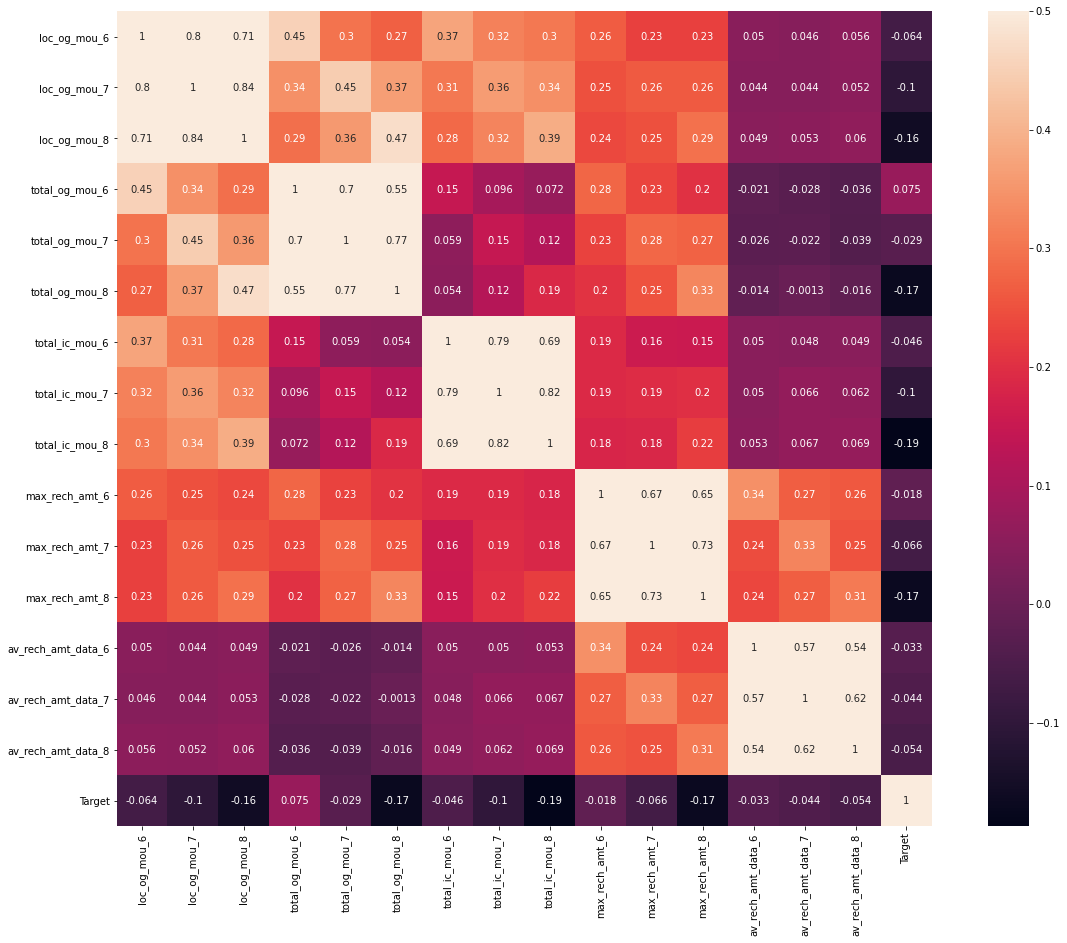

In [55]:

plt.figure(figsize=(20,15))
sns.heatmap(corrmat, vmax=0.5, square=True,annot=True);

### ` we can observe some of the highly correlated varaibles  are`
#### `loc_og_mou_7 ,loc_og_mou_8 and loc_og_mou_6`
#### `total_og_mou_6,total_og_mou_7 and total_og_mou_8`
#### `max_rech_amt_6,max_rech_amt_7 and max_rech_amt_8`
#### `av_rech_amt_data_6,av_rech_amt_data_7 and av_rech_amt_data_8`

### `customers are showing mostly same behaviour in all three months `


### Finding Relationship between outgoing minutes and Target

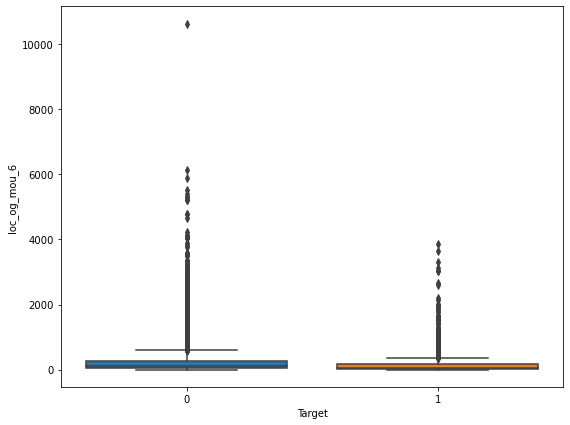

In [56]:
##Plot a box plot of loc_og_mou_6 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['loc_og_mou_6'])
plt.show()

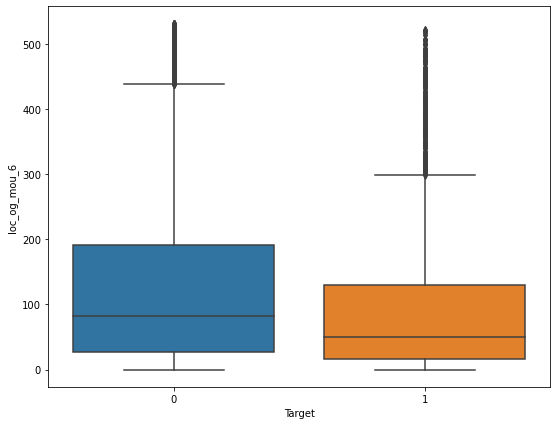

In [57]:
#capping the outliers for analysis
##Plot a box plot of loc_og_mou_6 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['loc_og_mou_6'][dataFinal['loc_og_mou_6']<dataFinal['loc_og_mou_6'].quantile(0.90)])
plt.show()

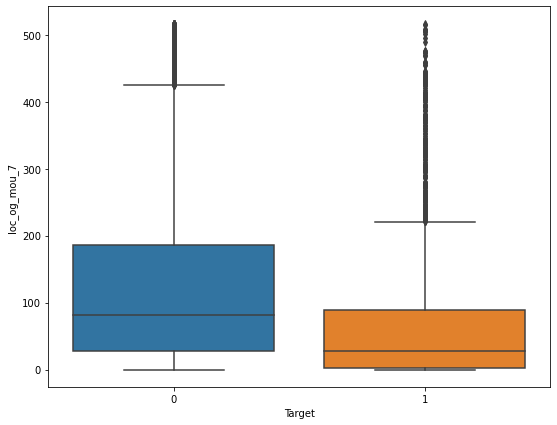

In [58]:
#capping the outliers for analysis
##Plot a box plot of loc_og_mou_7 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['loc_og_mou_7'][dataFinal['loc_og_mou_7']<dataFinal['loc_og_mou_7'].quantile(0.90)])
plt.show()

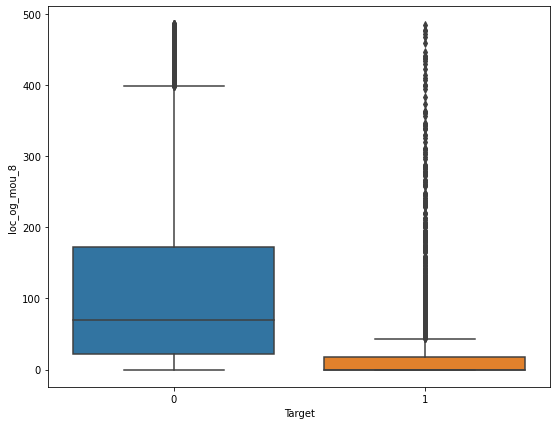

In [59]:
#capping the outliers for analysis
##Plot a box plot of loc_og_mou_7 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['loc_og_mou_8'][dataFinal['loc_og_mou_8']<dataFinal['loc_og_mou_8'].quantile(0.90)])
plt.show()

### `observation : people with low minutes of outgoing are likey to churn`

### Finding Relationship between incoming minutes and Target

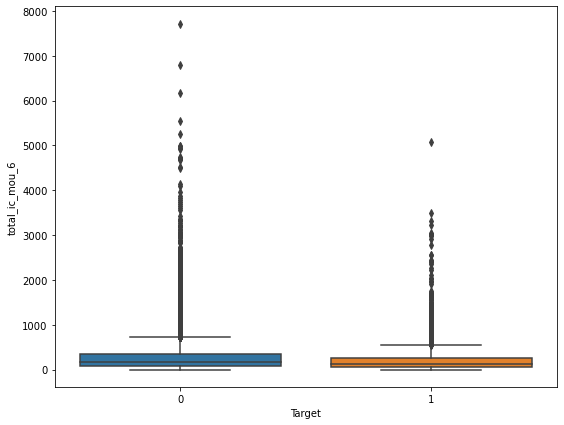

In [60]:
##Plot a box plot of total_ic_mou_6 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['total_ic_mou_6'])
plt.show()

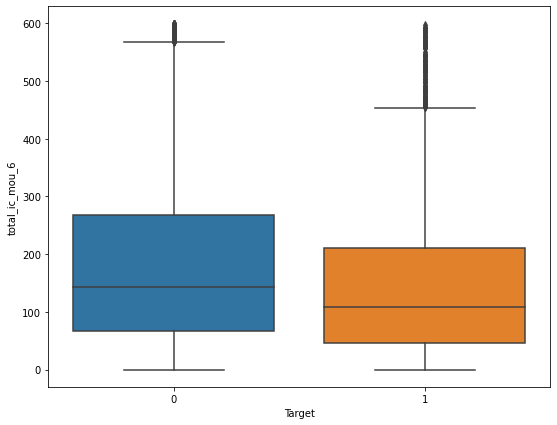

In [61]:
#capping the outliers for analysis
##Plot a box plot of total_ic_mou_6 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['total_ic_mou_6'][dataFinal['total_ic_mou_6']<dataFinal['total_ic_mou_6'].quantile(0.90)])
plt.show()

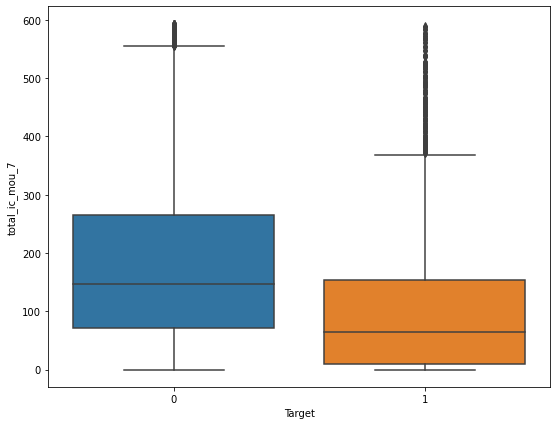

In [62]:
#capping the outliers for analysis
##Plot a box plot of total_ic_mou_7 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['total_ic_mou_7'][dataFinal['total_ic_mou_7']<dataFinal['total_ic_mou_7'].quantile(0.90)])
plt.show()

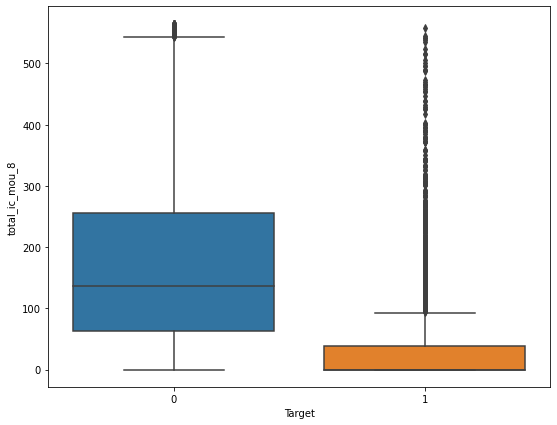

In [63]:
#capping the outliers for analysis
##Plot a box plot of total_ic_mou_8 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['total_ic_mou_8'][dataFinal['total_ic_mou_8']<dataFinal['total_ic_mou_8'].quantile(0.90)])
plt.show()

### `observation : people with low minutes of incoming are likey to churn`

### Finding Relationship between Recharge amount and Target

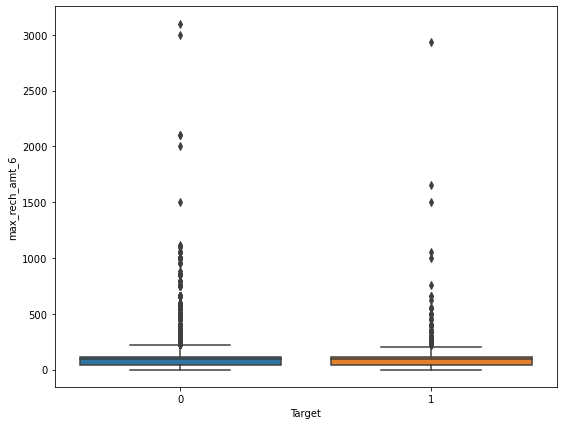

In [64]:
##Plot a box plot of max_rech_amt_6 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['max_rech_amt_6'])
plt.show()

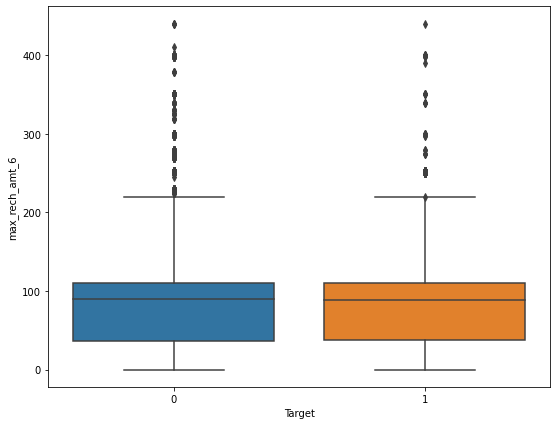

In [65]:
#capping the outliers for analysis
##Plot a box plot of max_rech_amt_6 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['max_rech_amt_6'][dataFinal['max_rech_amt_6']<dataFinal['max_rech_amt_6'].quantile(0.99)])
plt.show()

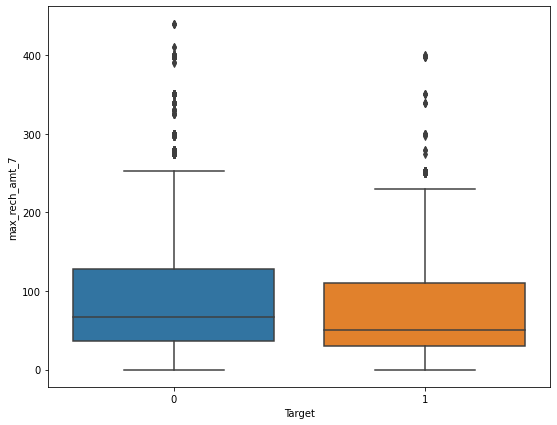

In [66]:
#capping the outliers for analysis
##Plot a box plot of max_rech_amt_7 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['max_rech_amt_7'][dataFinal['max_rech_amt_7']<dataFinal['max_rech_amt_7'].quantile(0.99)])
plt.show()

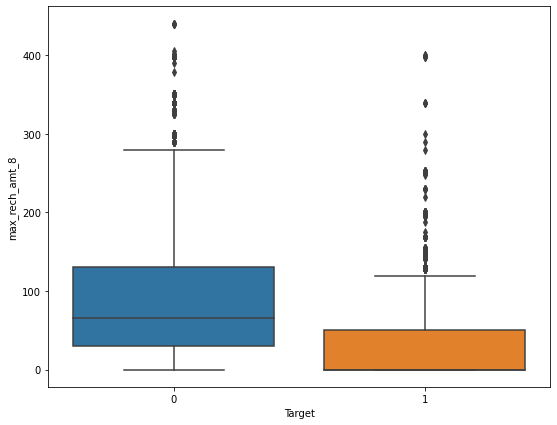

In [67]:
#capping the outliers for analysis
##Plot a box plot of max_rech_amt_8 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['max_rech_amt_8'][dataFinal['max_rech_amt_8']<dataFinal['max_rech_amt_8'].quantile(0.99)])
plt.show()

### `people with low recharge amount in 8th month are more likey to churn`

### Finding Relationship between average data Recharge and Target

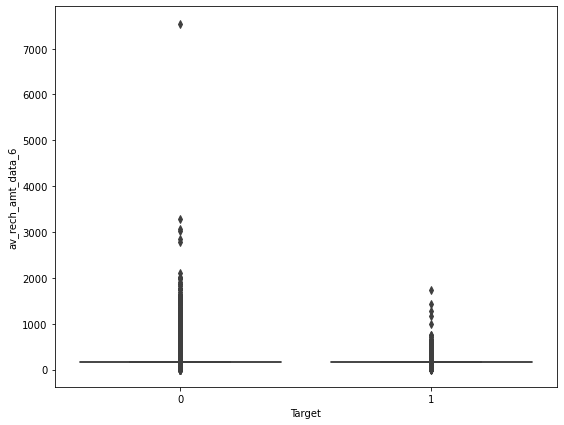

In [68]:
##Plot a box plot of av_rech_amt_data_6 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['av_rech_amt_data_6'])
plt.show()

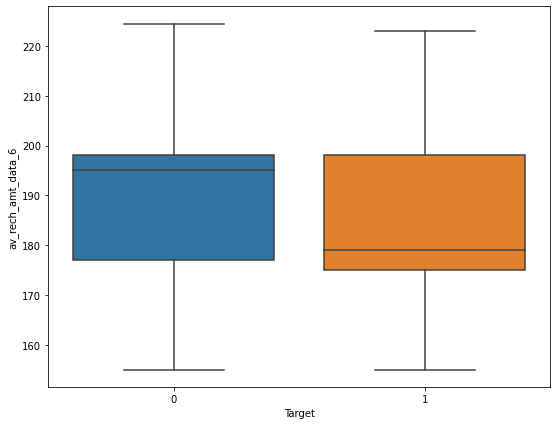

In [69]:
#capping the outliers for analysis
##Plot a box plot of av_rech_amt_data_6 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['av_rech_amt_data_6'][(dataFinal['av_rech_amt_data_6']<dataFinal['av_rech_amt_data_6'].quantile(0.90)) & (dataFinal['av_rech_amt_data_6']>dataFinal['av_rech_amt_data_6'].quantile(0.30))])
plt.show()

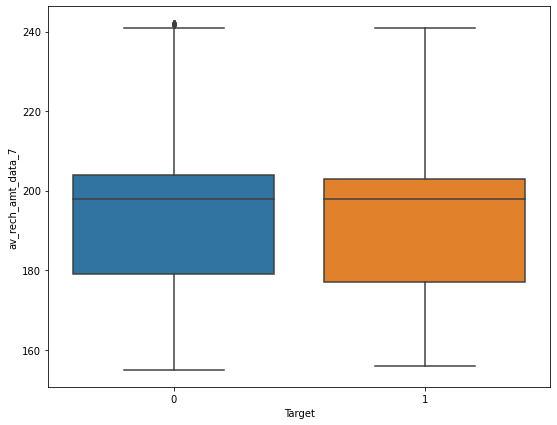

In [70]:
#capping the outliers for analysis
##Plot a box plot of av_rech_amt_data_7 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['av_rech_amt_data_7'][(dataFinal['av_rech_amt_data_7']<dataFinal['av_rech_amt_data_7'].quantile(0.90)) & (dataFinal['av_rech_amt_data_7']>dataFinal['av_rech_amt_data_7'].quantile(0.30))])
plt.show()

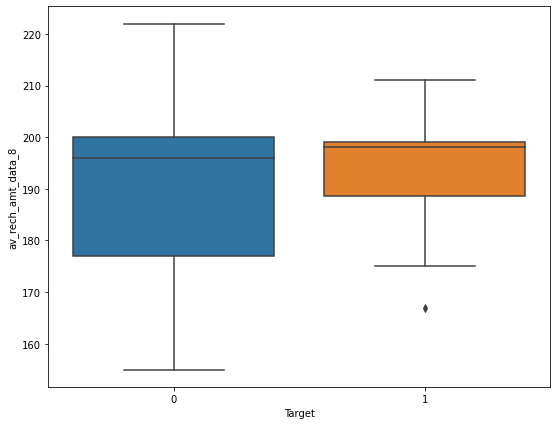

In [71]:
#capping the outliers for analysis
##Plot a box plot of av_rech_amt_data_8 vs Target
plt.figure(figsize=[9,7])
sns.boxplot(dataFinal["Target"],dataFinal['av_rech_amt_data_8'][(dataFinal['av_rech_amt_data_8']<dataFinal['av_rech_amt_data_8'].quantile(0.90)) & (dataFinal['av_rech_amt_data_8']>dataFinal['av_rech_amt_data_8'].quantile(0.30))])
plt.show()

### `people with  more average data recharge amount for 8th month are more likey to churn `

# `Step 7:Train Test Split`

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Putting feature variable to X
X = dataFinal.drop(['Target'], axis=1)

X.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
45,247.064,7.500,0.000,7.94,0.00,0.00,146.91,0.00,0.00,25.48,0.00,0.00,154.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,12,5,1,250,0,0,50,0,0,0,0,0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.0,154.0,154.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,740,0.00,0.0,0.0,0.0
83,153.455,157.462,32.853,119.34,137.94,16.51,36.16,252.59,2.03,0.10,0.00,0.00,0.00,0.00,0.00,0.08,0.19,0.00,0.13,0.25,0.00,0.00,0.00,0.00,1.85,137.06,0.0,0.21,0.44,0.00,119.26,137.74,16.51,29.19,5.24,0.00,0.0,0.0,0.0,0.0,0.0,0.0,148.46,142.99,16.51,0.0,0.0,0.0,16.48,306.63,5.41,0.00,0.0,0.0,165.16,450.08,21.93,0.13,0.43,0.00,0.50,0.79,0.00,0.00,0.00,0.0,0.63,1.23,0.00,32.03,36.28,0.76,146.08,19.44,0.0,0.00,0.0,0.0,0.0,0.0,0.0,178.11,55.73,0.76,178.74,56.96,0.76,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,12,18,5,180,170,37,20,30,17,20,0,10,1.0,1.0,1.0,0.0,0.0,17.0,0.0,0.0,1.0,0.0,0.0,0.0,154.0,154.0,17.0,0.0,0.0,42.07,0.0,0.0,44.63,0.00,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0.0,1.0,433,70.99,0.0,0.0,0.0
97,374.863,294.023,183.043,433.59,415.66,221.06,74.54,43.66,31.86,0.00,0.00,6.16,0.00,0.00,23.91,2.83,16.19,9.73,16.99,23.14,17.79,3.54,1.46,1.83,0.40,0.00,0.0,23.38,40.81,29.36,430.76,399.46,191.31,53.59,13.81,8.33,0.0,0.0,0.0,0.0,0.0,0.0,484.36,413.28,199.64,0.0,0.0,0.0,2.54,11.81,2.01,0.86

In [74]:
# Putting target variable to y
y = dataFinal['Target']

y.head()

45     1
83     1
97     1
111    1
117    1
Name: Target, dtype: int64

In [75]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# `Step 8: Feature Scaling`

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
cols=X_train.columns

X_train[cols] = scaler.fit_transform(X_train[cols])




X_train.head()

<ipython-input-77-80c42fb4c19f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols] = scaler.fit_transform(X_train[cols])
C:\Users\renus\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
73657,-0.554859,0.224525,-0.851696,0.338962,1.838198,-0.495271,-0.705093,-0.556545,-0.645892,-0.163585,-0.130005,-0.143388,-0.190787,0.004769,-0.165496,-0.328485,-0.298101,-0.297842,-0.566337,-0.398706,-0.578197,-0.253837,-0.232133,-0.233573,0.086457,-0.201387,-0.221610,-0.587642,-0.456601,-0.562001,0.587721,2.273534,-0.386293,-0.436389,-0.396395,-0.397850,-0.109560,-0.104963,-0.104262,0.0,0.0,0.0,0.114649,1.274687,-0.523878,-0.036387,-0.035275,-0.033979,-0.206728,-0.341076,-0.301271,-0.198960,-0.028208,-0.014668,-0.223633,0.878299,-0.749954,-0.379120,-0.169131,-0.363457,-0.624822,-0.546800,-0.621409,-0.299474,-0.281277,-0.273674,-0.675107,-0.509441,-0.661666,-0.180635,0.056039,-0.187275,-0.277771,-0.186235,-0.252399,-0.106192,-0.090542,-0.111018,0.0,0.0,0.0,-0.321138,-0.118226,-0.299898,-0.734715,-0.511472,-0.704732,-0.453226,-0.157836,-0.233659,-0.129257,-0.135353,-0.121811,-0.100515,-0.116960,-0.110449,-0.133104,0.490860,-1.085108,-0.427752,0.108433,-0.809629,0.173505,0.148239,-0.925953,0.886995,-0.031677,-0.651903,-0.378108,-0.376197,-0.350894,-0.463034,-0.454626,-0.443209,-0.433523,-0.429455,-0.418419,-0.238699,-0.225545,-0.214722,-0.091353,-0.119113,-0.102549,-0.306844,-0.288334,-0.265108,-0.251633,-0.264323,-0.256352,-0.239830,-0.232145,-0.230638,-0.267461,-0.255841,-0.252166,-0.130643,-0.118240,-0.108933,-0.255791,-0.260828,-0.250048,-0.405162,-0.402164,-0.391746,-0.202981,-0.190865,-0.192528,-0.174564,-0.166896,-0.157543,-0.698277,-0.682856,-0.654501,-0.998491,-0.271247,-0.259993,-0.243723,-0.128688
64813,-0.348819,-0.338495,-0.596268,0.810791,-0.392387,-0.405542,-0.567029,-0.543336,-0.518323,-0.175662,-0.146045,-0.143388,-0.202361,-0.185269,-0.165496,2.434567,-0.190230,-0

In [78]:
print("shape of x",X_train.shape)
print("shape of y",y_train.shape)

shape of x (20380, 158)
shape of y (20380,)


# `Step 9 : Model Building`
## `Bulding Interpretable model to predict important Variables`

### `Model 1`

In [79]:
import statsmodels.api as sm

In [80]:
#Running first Traning model
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

C:\Users\renus\Anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
C:\Users\renus\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\renus\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\renus\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\renus\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:893: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\renus\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                20380
Model:                            GLM   Df Residuals:                    20233
Model Family:                Binomial   Df Model:                          146
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 03 May 2021   Deviance:                          nan
Time:                        14:20:54   Pearson chi2:                 9.23e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -1.26e+15    4.7e+05  -2.68e+09      0.000   -1.26e+15   -1.26e+15
arpu_6             -9.183e+13   3.79e+06  -2.42e+07      0.000   -9.18e+13   -9.18e+13
arpu_7              6.898e+13   3.53e+06   1.95e+07      0.000     6.9e+13     6.9e+13
arpu_8              2.464e+14   4.14e+06   5.94e+07      0.000    2.46e+14    2.46e+14
onnet_mou_6        -1.326e+15   3.74e+07  -3.55e+07      0.000   -1.33e+15   -1.33e+15
onnet_mou_7        -2.922e+14   2.85e+07  -1.03e+07      0.000   -2.92e+14   -2.92e+14
onnet_mou_8         6.877e+14   2.73e+07   2.52e+07      0.000    6.88e+14    6.88e+14
offnet_mou_6       -1.379e+15   3.64e+07  -3.79e+07      0.000   -1.38e+15   -1.38e+15
offnet_mou_7        -3.97e+14   2.57e+07  -1.55e+07      0.000   -3.97e+14   -3.97e+14
offnet_mou_8        1.027e+15   2.62e+07   3.92e+07      0.000    1.03e+15    1.03e+15
roam_ic_mou_6       1.997e+13   6.82e+05   2.93e+07      0.000       2e+13       2e+13
roam_ic_mou_7       1.226e+13   7.65e+05    1.6e+07      0.000    1.23e+13    1.23e+13
roam_ic_mou_8      -1.712e+13   6.98e+05  -2.45e+07      0.000   -1.71e+13   -1.71e+13
roam_og_mou_6       3.336e+14   9.02e+06    3.7e+07      0.000    3.34e+14    3.34e+14
roam_og_mou_7        6.42e+13   4.87e+06   1.32e+07      0.000    6.42e+13    6.42e+13
roam_og_mou_8      -1.903e+14   5.55e+06  -3.43e+07      0.000    -1.9e+14    -1.9e+14
loc_og_t2t_mou_6   -7.167e+16    1.9e+10  -3.78e+06      0.000   -7.17e+16   -7.17e+16
loc_og_t2t_mou_7   -1.074e+18   2.04e+10  -5.26e+07      0.000   -1.07e+18   -1.07e+18
loc_og_t2t_mou_8   -5.213e+16   1.88e+10  -2.78e+06      0.000   -5.21e+16   -5.21e+16
loc_og_t2m_mou_6   -7.389e+16   1.96e+10  -3.78e+06      0.000   -7.39e+16   -7.39e+16
loc_og_t2m_mou_7   -9.791e+17   1.86e+10  -5.26e+07      0.000   -9.79e+17   -9.79e+17
loc_og_t2m_mou_8   -5.008e+16    1.8e+10  -2.78e+06      0.000   -5.01e+16   -5.01e+16
loc_og_t2f_mou_6   -4.171e+15   1.11e+09  -3.76e+06      0.000   -4.17e+15   -4.17e+15
loc_og_t2f_mou_7    -6.33e+16    1.2e+09  -5.26e+07      0.000   -6.33e+16   -6.33e+16
loc_og_t2f_mou_8   -2.981e+15   1.08e+09  -2.75e+06      0.000   -2.98e+15   -2.98e+15
loc_og_t2c_mou_6   -1.572e+13   5.98e+05  -2.63e+07      0.000   -1.57e+13   -1.57e+13
loc_og_t2c_mou_7    1.754e+11   7.24e+05   2.42e+05      0.000    1.75e+11    1.75e+11
loc_og_t2c_mou_8    1.943e+13    6.5e+05   2.99e+07      0.000    1.94e+13    1.94e+13
loc_og_mou_6         -1.4e+18   3.58e+10  -3.91e+07      0.000    -1.4e+18    -1.4e+18
loc_og_mou_7        9.779e+17   3.83e+10   2.55e+07      0.000    9.78e+17    9.78e+17
loc_og_mou_8        4.402e+17   3.75e+10   1.17e+07      0.000     4.4e+17     4.4e+17
std_og_t2t_mou_6   -6.331e+17   4.34e+10  -1.46e+07      0.000   -6.33e+17   -6.33e+17
std_og_t2t_mou_7   -7.252e+17   4.57e+

In [81]:
#Running RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### RFE

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 50 variables as input
rfe = rfe.fit(X_train, y_train)

C:\Users\renus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=30 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\renus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\renus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of 

In [83]:
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
       False,  True,

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 43),
 ('arpu_7', True, 1),
 ('arpu_8', False, 15),
 ('onnet_mou_6', False, 49),
 ('onnet_mou_7', False, 4),
 ('onnet_mou_8', False, 66),
 ('offnet_mou_6', False, 80),
 ('offnet_mou_7', False, 72),
 ('offnet_mou_8', False, 102),
 ('roam_ic_mou_6', False, 50),
 ('roam_ic_mou_7', False, 87),
 ('roam_ic_mou_8', False, 115),
 ('roam_og_mou_6', False, 120),
 ('roam_og_mou_7', False, 59),
 ('roam_og_mou_8', False, 3),
 ('loc_og_t2t_mou_6', False, 48),
 ('loc_og_t2t_mou_7', False, 58),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 13),
 ('loc_og_t2m_mou_7', False, 34),
 ('loc_og_t2m_mou_8', False, 39),
 ('loc_og_t2f_mou_6', False, 82),
 ('loc_og_t2f_mou_7', False, 84),
 ('loc_og_t2f_mou_8', False, 31),
 ('loc_og_t2c_mou_6', False, 116),
 ('loc_og_t2c_mou_7', False, 85),
 ('loc_og_t2c_mou_8', False, 45),
 ('loc_og_mou_6', False, 113),
 ('loc_og_mou_7', False, 83),
 ('loc_og_mou_8', False, 40),
 ('std_og_t2t_mou_6', False, 47),
 ('std_og_t2t_mou_7', False, 5),
 

In [85]:
#Relevant cols
col = X_train.columns[rfe.support_]

In [86]:
#Irrelevant cols
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=128)

In [87]:
#Assesing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                20380
Model:                            GLM   Df Residuals:                    20349
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4207.6
Date:                Mon, 03 May 2021   Deviance:                       8415.1
Time:                        14:21:45   Pearson chi2:                 4.53e+06
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.9397      0.719     -8.257      0.000      -7.350      -4.530
arpu_7                 0.3659      0.059      6.199      0.000       0.250       0.482
loc_og_t2t_mou_8      -0.2704      0.128     -2.110      0.035      -0.522      -0.019
isd_og_mou_8          -0.6456      0.060    -10.751      0.000      -0.763      -0.528
spl_og_mou_8          -0.2212      0.079     -2.802      0.005      -0.376      -0.066
og_others_8           -3.9435      3.238     -1.218      0.223     -10.290       2.403
loc_ic_t2m_mou_7       0.2911      0.089      3.274      0.001       0.117       0.465
loc_ic_t2m_mou_8      -1.2484      0.251     -4.971      0.000      -1.741      -0.756
loc_ic_t2f_mou_8      -1.1549      0.210     -5.496      0.000      -1.567      -0.743
loc_ic_mou_8          -0.8080      0.245     -3.293      0.001      -1.289      -0.327
std_ic_t2m_mou_8      -0.2009      0.152     -1.318      0.187      -0.500       0.098
std_ic_t2f_mou_8      -0.4278      0.220     -1.946      0.052      -0.859       0.003
std_ic_mou_8          -0.2727      0.135     -2.015      0.044      -0.538      -0.007
total_ic_mou_7         0.2223      0.078      2.852      0.004       0.070       0.375
spl_ic_mou_8          -1.2861      0.139     -9.243      0.000      -1.559      -1.013
total_rech_num_8      -1.0847      0.058    -18.558      0.000      -1.199      -0.970
total_rech_amt_6       0.4825      0.044     10.846      0.000       0.395       0.570
max_rech_amt_8        -0.3487      0.067     -5.188      0.000      -0.480      -0.217
last_day_rch_amt_8    -0.9601      0.074    -12.955      0.000      -1.105      -0.815
total_rech_data_7      0.5344      0.124      4.295      0.000       0.291       0.778
total_rech_data_8      1.3480      0.612      2.201      0.028       0.147       2.548
count_rech_2g_7       -0.7241      0.423     -1.714      0.087      -1.552       0.104
count_rech_2g_8       -1.2419      0.515     -2.411      0.016      -2.251      -0.232
count_rech_3g_8       -0.6362      0.290     -2.197      0.028      -1.204      -0.069
av_rech_amt_data_8    -0.3873      0.132     -2.942      0.003      -0.645      -0.129
vol_3g_mb_7           -0.1826      0.064     -2.855      0.004      -0.308      -0.057
arpu_2g_8              0.3196      0.147      2.175      0.030       0.032       0.608
sachet_2g_7            0.3112      0.433      0.719      0.472      -0.537       1.159
fb_user_8             -0.2119      0.086     -2.469      0.014      -0.380      -0.044
aon                   -0.2524      0.038     -6.631      0.000      -0.327      -0.178
sep_vbc_3g           -13.6350      5.561     -2.452      0.014     -24.534      -2.736
======================================================================================
"""

In [88]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:20]

73657    6.091136e-01
64813    8.397702e-02
5913     6.918441e-02
96524    3.225685e-03
59705    3.383267e-03
94016    4.869029e-01
30943    7.551090e-02
88160    2.154214e-10
27340    1.346269e-03
98102    1.833926e-02
73610    1.473349e-01
17086    4.968935e-02
83923    1.711569e-02
43238    3.763693e-01
63261    5.051586e-02
84171    7.275818e-03
20361    3.642926e-02
26890    5.841964e-02
29788    5.752843e-01
2744     1.741173e-08
dtype: float64

In [89]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.09113600e-01, 8.39770219e-02, 6.91844062e-02, 3.22568463e-03,
       3.38326693e-03, 4.86902913e-01, 7.55109020e-02, 2.15421372e-10,
       1.34626876e-03, 1.83392617e-02])

In [90]:
# Creating a dataframe with the actual Target variable and target prediction probablity
y_train_pred_final = pd.DataFrame({'Target':y_train.values, 'Target_prob':y_train_pred})


y_train_pred_final.head()

,Target,Target_prob
0,1,0.609114
1,0,0.083977
2,0,0.069184
3,0,0.003226
4,0,0.003383


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [91]:
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Target,Target_prob,predicted
0,1,0.609114,1
1,0,0.083977,0
2,0,0.069184,0
3,0,0.003226,0
4,0,0.003383,0


In [92]:
from sklearn import metrics

In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
print(confusion)

[[17891   383]
 [ 1224   882]]


In [94]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708  

In [95]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

0.9211481844946026


#### Checking VIF

In [96]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,total_rech_data_8,217.52
21,count_rech_2g_8,168.47
26,sachet_2g_7,105.00
20,count_rech_2g_7,100.01
22,count_rech_3g_8,47.20
18,total_rech_data_7,13.73
25,arpu_2g_8,6.40
6,loc_ic_t2m_mou_8,6.32
8,loc_ic_mou_8,6.06
27,fb_user_8,5.60


#### `lets drop the column with very high vif i.e total_rech_data_8 since its not contributing much in analysis`

In [98]:
col = col.drop('total_rech_data_8', 1)
col

Index(['arpu_7', 'loc_og_t2t_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_7', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'vol_3g_mb_7', 'arpu_2g_8', 'sachet_2g_7', 'fb_user_8', 'aon',
       'sep_vbc_3g'],
      dtype='object')

### `Model 2`

In [99]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                20380
Model:                            GLM   Df Residuals:                    20350
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4210.0
Date:                Mon, 03 May 2021   Deviance:                       8420.0
Time:                        14:21:46   Pearson chi2:                 4.32e+06
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.9208      0.715     -8.277      0.000      -7.323      -4.519
arpu_7                 0.3681      0.059      6.245      0.000       0.253       0.484
loc_og_t2t_mou_8      -0.2801      0.130     -2.160      0.031      -0.534      -0.026
isd_og_mou_8          -0.6333      0.060    -10.569      0.000      -0.751      -0.516
spl_og_mou_8          -0.2181      0.079     -2.772      0.006      -0.372      -0.064
og_others_8           -4.0396      3.259     -1.240      0.215     -10.426       2.347
loc_ic_t2m_mou_7       0.2934      0.089      3.306      0.001       0.119       0.467
loc_ic_t2m_mou_8      -1.2617      0.251     -5.020      0.000      -1.754      -0.769
loc_ic_t2f_mou_8      -1.1592      0.210     -5.512      0.000      -1.571      -0.747
loc_ic_mou_8          -0.7950      0.246     -3.234      0.001      -1.277      -0.313
std_ic_t2m_mou_8      -0.2006      0.153     -1.311      0.190      -0.501       0.099
std_ic_t2f_mou_8      -0.4331      0.220     -1.972      0.049      -0.864      -0.003
std_ic_mou_8          -0.2749      0.136     -2.020      0.043      -0.542      -0.008
total_ic_mou_7         0.2192      0.078      2.821      0.005       0.067       0.372
spl_ic_mou_8          -1.2833      0.139     -9.236      0.000      -1.556      -1.011
total_rech_num_8      -1.0782      0.058    -18.503      0.000      -1.192      -0.964
total_rech_amt_6       0.4796      0.044     10.785      0.000       0.392       0.567
max_rech_amt_8        -0.3766      0.066     -5.683      0.000      -0.507      -0.247
last_day_rch_amt_8    -0.9533      0.074    -12.886      0.000      -1.098      -0.808
total_rech_data_7      0.5522      0.126      4.367      0.000       0.304       0.800
count_rech_2g_7       -0.8009      0.421     -1.903      0.057      -1.626       0.024
count_rech_2g_8       -0.1297      0.086     -1.507      0.132      -0.298       0.039
count_rech_3g_8       -0.0415      0.097     -0.427      0.670      -0.232       0.149
av_rech_amt_data_8    -0.1889      0.096     -1.964      0.050      -0.377      -0.000
vol_3g_mb_7           -0.1962      0.064     -3.051      0.002      -0.322      -0.070
arpu_2g_8              0.1743      0.137      1.268      0.205      -0.095       0.444
sachet_2g_7            0.3783      0.431      0.878      0.380      -0.466       1.223
fb_user_8             -0.3204      0.068     -4.688      0.000      -0.454      -0.186
aon                   -0.2549      0.038     -6.705      0.000      -0.329      -0.180
sep_vbc_3g           -13.5677      5.530     -2.454      0.014     -24.406      -2.729
======================================================================================
"""

In [100]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [101]:
y_train_pred[:10]

array([6.10009367e-01, 8.31838953e-02, 6.91214041e-02, 3.27919459e-03,
       3.24828250e-03, 4.84745009e-01, 8.37905170e-02, 2.37397362e-10,
       1.32772914e-03, 1.67697777e-02])

In [102]:
y_train_pred_final['Target_prob'] = y_train_pred

In [103]:
# Creating new column 'predicted' with 1 if target probablity > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Target,Target_prob,predicted
0,1,0.610009,1
1,0,0.083184,0
2,0,0.069121,0
3,0,0.003279,0
4,0,0.003248,0


In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
print(confusion)

[[17891   383]
 [ 1223   883]]


In [105]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

0.9211972522080472


#### Checking VIF again

In [106]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,sachet_2g_7,104.59
19,count_rech_2g_7,99.35
18,total_rech_data_7,13.66
6,loc_ic_t2m_mou_8,6.32
8,loc_ic_mou_8,6.06
24,arpu_2g_8,5.77
5,loc_ic_t2m_mou_7,4.74
12,total_ic_mou_7,4.54
11,std_ic_mou_8,4.31
9,std_ic_t2m_mou_8,3.74


In [107]:
# Let's drop sachet_2g_7 since it has a high VIF
col = col.drop('sachet_2g_7')
col

Index(['arpu_7', 'loc_og_t2t_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_7', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'vol_3g_mb_7', 'arpu_2g_8', 'fb_user_8', 'aon', 'sep_vbc_3g'],
      dtype='object')

### Model 3

In [108]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()


#predicting the value of target variable 
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

#creating new variable target prob which will hold the predicted value of target varibale 
y_train_pred_final['Target_prob'] = y_train_pred


# Creating new column 'predicted' with 1 if target probablity > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Target,Target_prob,predicted
0,1,0.609175,1
1,0,0.082922,0
2,0,0.069382,0
3,0,0.003296,0
4,0,0.003217,0


In [109]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
print(confusion)

[[17892   382]
 [ 1223   883]]


In [110]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

0.9212463199214916


### Checking VIF again

In [111]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,total_rech_data_7,12.70
19,count_rech_2g_7,12.60
6,loc_ic_t2m_mou_8,6.32
8,loc_ic_mou_8,6.06
24,arpu_2g_8,5.40
5,loc_ic_t2m_mou_7,4.74
12,total_ic_mou_7,4.54
11,std_ic_mou_8,4.31
9,std_ic_t2m_mou_8,3.74
22,av_rech_amt_data_8,3.56


In [112]:
# Let's drop total_rech_data_7since it has a high VIF
col = col.drop('total_rech_data_7')
col

Index(['arpu_7', 'loc_og_t2t_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'total_ic_mou_7', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_3g_mb_7', 'arpu_2g_8',
       'fb_user_8', 'aon', 'sep_vbc_3g'],
      dtype='object')

### Model 4

In [113]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()


#predicting the value of target variable 
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

#creating new variable target prob which will hold the predicted value of target varibale 
y_train_pred_final['Target_prob'] = y_train_pred


# Creating new column 'predicted' with 1 if target probablity > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Target,Target_prob,predicted
0,1,0.607061,1
1,0,0.081501,0
2,0,0.068653,0
3,0,0.001881,0
4,0,0.003083,0


In [114]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
print(confusion)

[[17891   383]
 [ 1230   876]]


In [115]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

0.9208537782139352


### Checking VIF again

In [116]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_t2m_mou_8,6.32
8,loc_ic_mou_8,6.06
23,arpu_2g_8,5.33
5,loc_ic_t2m_mou_7,4.73
12,total_ic_mou_7,4.53
11,std_ic_mou_8,4.31
9,std_ic_t2m_mou_8,3.74
21,av_rech_amt_data_8,3.56
0,arpu_7,3.54
19,count_rech_2g_8,2.90


In [117]:
# Let's drop loc_ic_t2m_mou_8 since it has a high VIF
col = col.drop('loc_ic_t2m_mou_8')
col

Index(['arpu_7', 'loc_og_t2t_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_6', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_8',
       'av_rech_amt_data_8', 'vol_3g_mb_7', 'arpu_2g_8', 'fb_user_8', 'aon',
       'sep_vbc_3g'],
      dtype='object')

### Model 5

In [118]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()


#predicting the value of target variable 
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

#creating new variable target prob which will hold the predicted value of target varibale 
y_train_pred_final['Target_prob'] = y_train_pred


# Creating new column 'predicted' with 1 if target probablity > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Target,Target_prob,predicted
0,1,0.611540,1
1,0,0.067371,0
2,0,0.071061,0
3,0,0.002391,0
4,0,0.003149,0


In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
print(confusion)

[[17897   377]
 [ 1233   873]]


In [120]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

0.9210009813542689


### Checking VIF again

In [121]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,arpu_2g_8,5.33
10,std_ic_mou_8,4.23
11,total_ic_mou_7,3.84
8,std_ic_t2m_mou_8,3.74
20,av_rech_amt_data_8,3.56
0,arpu_7,3.54
18,count_rech_2g_8,2.90
7,loc_ic_mou_8,2.81
5,loc_ic_t2m_mou_7,2.79
14,total_rech_amt_6,2.77


In [122]:
# Let's drop arpu_2g_8 since it has a high VIFarpu_2g_8
col = col.drop('arpu_2g_8')
col

Index(['arpu_7', 'loc_og_t2t_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_7', 'spl_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_6', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_8',
       'av_rech_amt_data_8', 'vol_3g_mb_7', 'fb_user_8', 'aon', 'sep_vbc_3g'],
      dtype='object')

### Model 6

In [123]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()


#predicting the value of target variable 
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

#creating new variable target prob which will hold the predicted value of target varibale 
y_train_pred_final['Target_prob'] = y_train_pred


# Creating new column 'predicted' with 1 if target probablity > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Target_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Target,Target_prob,predicted
0,1,0.611031,1
1,0,0.067372,0
2,0,0.071126,0
3,0,0.002414,0
4,0,0.003166,0


In [124]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Target   No. Observations:                20380
Model:                            GLM   Df Residuals:                    20354
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4233.3
Date:                Mon, 03 May 2021   Deviance:                       8466.6
Time:                        14:21:51   Pearson chi2:                 2.94e+06
No. Iterations:                    14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.8642      0.723     -8.114      0.000      -7.281      -4.448
arpu_7                 0.3802      0.060      6.337      0.000       0.263       0.498
loc_og_t2t_mou_8      -0.1770      0.109     -1.618      0.106      -0.391       0.037
isd_og_mou_8          -0.6332      0.059    -10.650      0.000      -0.750      -0.517
spl_og_mou_8          -0.2177      0.079     -2.766      0.006      -0.372      -0.063
og_others_8           -3.7368      3.077     -1.214      0.225      -9.768       2.294
loc_ic_t2m_mou_7       0.1455      0.083      1.758      0.079      -0.017       0.308
loc_ic_t2f_mou_8      -1.0551      0.212     -4.988      0.000      -1.470      -0.641
loc_ic_mou_8          -1.9535      0.149    -13.115      0.000      -2.245      -1.662
std_ic_t2m_mou_8      -0.2380      0.160     -1.483      0.138      -0.553       0.076
std_ic_t2f_mou_8      -0.4534      0.222     -2.045      0.041      -0.888      -0.019
std_ic_mou_8          -0.2865      0.146     -1.957      0.050      -0.573       0.000
total_ic_mou_7         0.2920      0.076      3.827      0.000       0.142       0.441
spl_ic_mou_8          -1.2913      0.139     -9.269      0.000      -1.564      -1.018
total_rech_num_8      -1.0856      0.058    -18.613      0.000      -1.200      -0.971
total_rech_amt_6       0.4746      0.045     10.625      0.000       0.387       0.562
max_rech_amt_8        -0.3934      0.066     -5.982      0.000      -0.522      -0.264
last_day_rch_amt_8    -0.9502      0.074    -12.889      0.000      -1.095      -0.806
count_rech_2g_7        0.0626      0.044      1.414      0.157      -0.024       0.149
count_rech_2g_8       -0.1438      0.085     -1.699      0.089      -0.310       0.022
count_rech_3g_8        0.1948      0.053      3.688      0.000       0.091       0.298
av_rech_amt_data_8    -0.1657      0.077     -2.165      0.030      -0.316      -0.016
vol_3g_mb_7           -0.0703      0.052     -1.354      0.176      -0.172       0.031
fb_user_8             -0.3381      0.060     -5.678      0.000      -0.455      -0.221
aon                   -0.2608      0.038     -6.891      0.000      -0.335      -0.187
sep_vbc_3g           -13.3491      5.590     -2.388      0.017     -24.306      -2.392
======================================================================================
"""

In [125]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.predicted )
print(confusion)

[[17897   377]
 [ 1234   872]]


In [126]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.predicted))

0.9209519136408243


### Checking VIF again

In [127]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,std_ic_mou_8,4.23
11,total_ic_mou_7,3.84
8,std_ic_t2m_mou_8,3.74
0,arpu_7,3.54
7,loc_ic_mou_8,2.81
5,loc_ic_t2m_mou_7,2.79
14,total_rech_amt_6,2.77
18,count_rech_2g_8,2.69
15,max_rech_amt_8,2.60
17,count_rech_2g_7,2.21


## `Model looks quite decent now , lets check it on other metrics too`

## Metrics beyond simply accuracy

In [128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.4140550807217474

In [130]:
# Let us calculate specificity
TN / float(TN+FP)

0.979369596147532

In [131]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.020630403852467987


In [132]:
# positive predictive value 
print (TP / float(TP+FP))

0.6981585268214572


In [133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9354973603052638


# Step 10 : Plotting the ROC Curve

An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [134]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [135]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Target, y_train_pred_final.Target_prob, drop_intermediate = False )

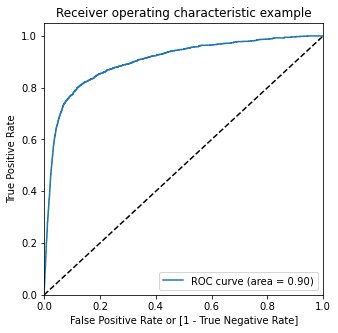

In [136]:
draw_roc(y_train_pred_final.Target, y_train_pred_final.Target_prob)

## Step 11: Finding Optimal Cutoff Point

### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Target_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Target,Target_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.611031,1,1,1,1,1,1,1,1,0,0,0
1,0,0.067372,0,1,0,0,0,0,0,0,0,0,0
2,0,0.071126,0,1,0,0,0,0,0,0,0,0,0
3,0,0.002414,0,1,0,0,0,0,0,0,0,0,0
4,0,0.003166,0,1,0,0,0,0,0,0,0,0,0


In [138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.103337  1.000000  0.000000
0.1   0.1  0.810648  0.851377  0.805954
0.2   0.2  0.892149  0.767806  0.906479
0.3   0.3  0.917517  0.697531  0.942870
0.4   0.4  0.925957  0.608737  0.962515
0.5   0.5  0.920952  0.414055  0.979370
0.6   0.6  0.910648  0.208452  0.991573
0.7   0.7  0.903778  0.100190  0.996388
0.8   0.8  0.900098  0.043685  0.998796
0.9   0.9  0.898086  0.016619  0.999672


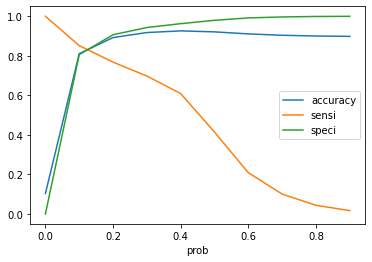

In [139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [140]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Target_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Target,Target_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.611031,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.067372,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.071126,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.002414,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.003166,0,1,0,0,0,0,0,0,0,0,0,0


In [141]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Target, y_train_pred_final.final_predicted)

0.8921491658488715

In [142]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Target, y_train_pred_final.final_predicted )
confusion2

array([[16565,  1709],
       [  489,  1617]], dtype=int64)

In [143]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [144]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7678062678062678

In [145]:
# Let us calculate specificity
TN / float(TN+FP)

0.906479150705921

In [146]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.09352084929407901


In [147]:
# Positive predictive value 
print (TP / float(TP+FP))

0.4861695730607336


In [148]:
# Negative predictive value
print (TN / float(TN+ FN))

0.971326375043978


# Step 12: making Predictions on Test Set

In [149]:
X_test[cols] = scaler.fit_transform(X_test[cols])

X_test_sm=X_test[col]




<ipython-input-149-4c6f7e2d1df4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols] = scaler.fit_transform(X_test[cols])
C:\Users\renus\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [150]:
X_test_sm = sm.add_constant(X_test_sm)

#### making Predictions on test set

In [151]:
y_test_pred = res.predict(X_test_sm)

In [152]:
y_test_pred[:10]

78812    0.009348
844      0.840385
52578    0.084574
14125    0.492947
90332    0.004758
65451    0.043577
63698    0.060366
54879    0.022110
59706    0.071397
62939    0.024330
dtype: float64

In [153]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [154]:
# Let's see the head
y_pred_1.head()

,0
78812,0.009348
844,0.840385
52578,0.084574
14125,0.492947
90332,0.004758


In [155]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [156]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [157]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [158]:
y_pred_final.head()

,Target,0
0,0,0.009348
1,1,0.840385
2,0,0.084574
3,1,0.492947
4,0,0.004758


In [159]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Target_prob'})

In [160]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Target,Target_prob
0,0,0.009348
1,1,0.840385
2,0,0.084574
3,1,0.492947
4,0,0.004758


In [161]:
y_pred_final['final_predicted'] = y_pred_final.Target_prob.map(lambda x: 1 if x > 0.2 else 0)

In [162]:
y_pred_final.head()

,Target,Target_prob,final_predicted
0,0,0.009348,0
1,1,0.840385,1
2,0,0.084574,0
3,1,0.492947,1
4,0,0.004758,0


In [163]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Target, y_pred_final.final_predicted)

0.8859759587864912

In [164]:
confusion2 = metrics.confusion_matrix(y_pred_final.Target, y_pred_final.final_predicted )
confusion2

array([[7049,  792],
       [ 204,  690]], dtype=int64)

In [165]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7718120805369127

In [167]:
# Let us calculate specificity
TN / float(TN+FP)

0.89899247544956

In [168]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10100752455044


In [169]:
# Positive predictive value 
print (TP / float(TP+FP))

0.46558704453441296


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9718737074314077


# Inference : As per our Final Model which is model 6

## Most Important Variables which determines churn rate are as follows


#### `arpu_7 :High average revenue per user for 7th month`
#### `loc_ic_t2m_mou_7 : for 7th month , high  incoming minutes ,local calls within same telecome circle, operator T to other operator mobile`
#### `total_ic_mou_7 : high total incoming minutes for 7th month`
#### `total_rech_amt_6: high total recharge amount for 6th month`
#### ` count_rech_2g_7:high number of count for 2g recharge for month 7`
#### `count_rech_3g_8:high number of count for 3g recgarge for 8th month`

### `customers with above characterstics  are likey to churn`





# Now we need to build another model , A High Performance model, Using PCA

### PCA on the data

Note -
While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
So we'll calculate the PCs using the train data, and apply them later on the test data

In [171]:
X_train.shape

(20380, 158)

In [172]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
73657,-0.554859,0.224525,-0.851696,0.338962,1.838198,-0.495271,-0.705093,-0.556545,-0.645892,-0.163585,-0.130005,-0.143388,-0.190787,0.004769,-0.165496,-0.328485,-0.298101,-0.297842,-0.566337,-0.398706,-0.578197,-0.253837,-0.232133,-0.233573,0.086457,-0.201387,-0.221610,-0.587642,-0.456601,-0.562001,0.587721,2.273534,-0.386293,-0.436389,-0.396395,-0.397850,-0.109560,-0.104963,-0.104262,0.0,0.0,0.0,0.114649,1.274687,-0.523878,-0.036387,-0.035275,-0.033979,-0.206728,-0.341076,-0.301271,-0.198960,-0.028208,-0.014668,-0.223633,0.878299,-0.749954,-0.379120,-0.169131,-0.363457,-0.624822,-0.546800,-0.621409,-0.299474,-0.281277,-0.273674,-0.675107,-0.509441,-0.661666,-0.180635,0.056039,-0.187275,-0.277771,-0.186235,-0.252399,-0.106192,-0.090542,-0.111018,0.0,0.0,0.0,-0.321138,-0.118226,-0.299898,-0.734715,-0.511472,-0.704732,-0.453226,-0.157836,-0.233659,-0.129257,-0.135353,-0.121811,-0.100515,-0.116960,-0.110449,-0.133104,0.490860,-1.085108,-0.427752,0.108433,-0.809629,0.173505,0.148239,-0.925953,0.886995,-0.031677,-0.651903,-0.378108,-0.376197,-0.350894,-0.463034,-0.454626,-0.443209,-0.433523,-0.429455,-0.418419,-0.238699,-0.225545,-0.214722,-0.091353,-0.119113,-0.102549,-0.306844,-0.288334,-0.265108,-0.251633,-0.264323,-0.256352,-0.239830,-0.232145,-0.230638,-0.267461,-0.255841,-0.252166,-0.130643,-0.118240,-0.108933,-0.255791,-0.260828,-0.250048,-0.405162,-0.402164,-0.391746,-0.202981,-0.190865,-0.192528,-0.174564,-0.166896,-0.157543,-0.698277,-0.682856,-0.654501,-0.998491,-0.271247,-0.259993,-0.243723,-0.128688
64813,-0.348819,-0.338495,-0.596268,0.810791,-0.392387,-0.405542,-0.567029,-0.543336,-0.518323,-0.175662,-0.146045,-0.143388,-0.202361,-0.185269,-0.165496,2.434567,-0.190230,-0

In [173]:
#importing PCA
from sklearn.decomposition import PCA

In [174]:
#creating object of PCA

pca = PCA(random_state=42)

#Fitting pca on train data
pca.fit(X_train)

PCA(random_state=42)

### Components from the PCA

In [175]:
pca.components_

array([[ 1.34784650e-01,  1.40895744e-01,  1.43387415e-01, ...,
         1.33964250e-01,  1.31306800e-01,  4.60779540e-02],
       [ 1.25052338e-01,  1.29302724e-01,  1.20882637e-01, ...,
        -7.26004770e-02, -7.15901556e-02, -3.02164501e-02],
       [-5.97043535e-02, -7.36811161e-02, -6.63001176e-02, ...,
        -1.87475286e-02, -2.11509112e-02, -7.97776623e-03],
       ...,
       [-0.00000000e+00, -1.45366495e-16,  1.25416530e-16, ...,
         2.28093260e-18,  1.19172468e-17, -1.00508093e-17],
       [-0.00000000e+00, -9.93799530e-18,  1.90760422e-16, ...,
         1.07550034e-16, -5.29857329e-17, -4.38780354e-17],
       [-0.00000000e+00,  4.50079119e-16, -2.36715989e-16, ...,
         3.10897253e-17,  1.56651760e-17, -2.24750140e-18]])

### Looking at the explained variance ratio for each component

In [176]:
pca.explained_variance_ratio_

array([1.23517443e-01, 9.22033084e-02, 6.39504605e-02, 4.83713592e-02,
       3.63678177e-02, 3.42265760e-02, 2.90019662e-02, 2.66462899e-02,
       2.31086628e-02, 2.08895953e-02, 2.02482092e-02, 1.97589802e-02,
       1.94553850e-02, 1.86869778e-02, 1.73433391e-02, 1.68363947e-02,
       1.53093078e-02, 1.38637299e-02, 1.24734007e-02, 1.15887159e-02,
       1.10189976e-02, 1.08918908e-02, 1.06143690e-02, 1.02898919e-02,
       1.00240988e-02, 9.83889576e-03, 8.43792211e-03, 8.33705460e-03,
       8.13614409e-03, 7.85542292e-03, 7.58310213e-03, 7.40924320e-03,
       7.00540014e-03, 6.94986359e-03, 6.60273938e-03, 6.39122639e-03,
       6.21029321e-03, 6.13647217e-03, 6.07216166e-03, 5.83652339e-03,
       5.72465801e-03, 5.55773035e-03, 5.36868123e-03, 5.10868397e-03,
       5.03456473e-03, 4.87734200e-03, 4.83697387e-03, 4.79431557e-03,
       4.64562313e-03, 4.54090845e-03, 4.38371824e-03, 4.24975636e-03,
       4.11142026e-03, 4.03213387e-03, 3.90442813e-03, 3.79687418e-03,
      

### Making a scree plot for the explained variance

In [177]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

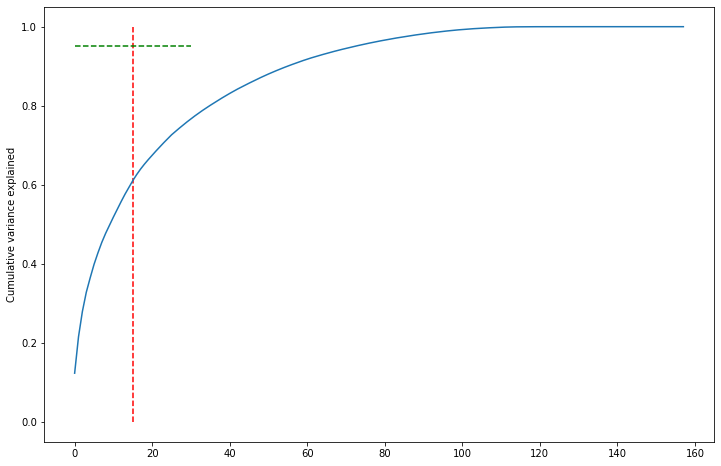

In [178]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### Perform PCA with 60 components

In [179]:
from sklearn.decomposition import IncrementalPCA

In [180]:
pca_final = IncrementalPCA(n_components=70)

In [181]:
df_train_pca = pca_final.fit_transform(X_train)

In [182]:
df_train_pca.shape

(20380, 70)

### Applying Transformation on test set

In [183]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8735, 70)

### Applying logistic regression on the data on our Principal components

In [184]:
#Creating object of Logistic regression
learner_pca = LogisticRegression()

In [185]:
model_pca = learner_pca.fit(df_train_pca, y_train)

C:\Users\renus\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Making predictions on the test set



In [186]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [187]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.9'

## Making it a little more unsupervised 

In [188]:
pca_again = PCA(0.9)

In [189]:
df_train_pca2 = pca_again.fit_transform(X_train)

In [190]:
df_train_pca2.shape

(20380, 56)

### Following it up with a logistic regression model

In [191]:
learner_pca2 = LogisticRegression()

In [192]:
model_pca2 = learner_pca2.fit(df_train_pca2, y_train)

In [193]:
df_test_pca2 = pca_again.transform(X_test)

In [194]:
df_test_pca2.shape

(8735, 56)

In [195]:
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]

In [196]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.89'

# We have build two models 

# `Interpretable model, which is model 6`

## Most Important Variables which determines churn rate are as follows:


#### `arpu_7 :High average revenue per user for 7th month`
#### `loc_ic_t2m_mou_7 : for 7th month , high  incoming minutes ,local calls within same telecome circle, operator T to other operator mobile`
#### `total_ic_mou_7 : high total incoming minutes for 7th month`
#### `total_rech_amt_6: high total recharge amount for 6th month`
#### ` count_rech_2g_7:high number of count for 2g recharge for month 7`
#### `count_rech_3g_8:high number of count for 3g recgarge for 8th month`

### `customers with above characterstics  are likey to churn`


# `High perfomance model, which is model_pca`


### according to this model roc_auc_score is 0.9 , which is quite good



# thank you !





